In [1]:
import pandas as pd
import geopandas as gpd
import fiona

#get and print the layer names
layername_list = fiona.listlayers('lab1.gpkg')
print(layername_list)

#create empty lists for feature classes and tables
soils = []
tables = []

#print a space
print()

#How many entries are there?
print('layername_list is', len(layername_list), 'entries long.')
print()

#assign soils to the soil list
i=0
while i < 9:
    soils.append(layername_list[i])
    i = i+1

#assign tables to the table list
i = 10
while i < 19:
    tables.append(layername_list[i])
    i = i + 1

#show what is in each list
print('The soils list contains', soils)
print()
print('The tables list conatins', tables)
print()

mergelist = []


#This is where I needed a lot of help. I have to give credit here to Megan as basically everything I tried on my own was useless.
for i in soils:
    for j in tables:
        #see if the the end of each df matches
        if((i[9:] in soils) == (j[9:] in tables)):
            #open each df
            soil_gdf = gpd.read_file('lab1.gpkg', layer = i)
            table_gdf = gpd.read_file('lab1.gpkg', layer = j)
            #make a file and merge them. This is the one step I got right from the start
            merge_file = soil_gdf.merge(table_gdf, left_on = 'MUSYM', right_on = 'musym')
            #add a column in each merged file using the identifier from the end of each df
            merge_file['mapunitid'] = i[9:15]
            #add each new merged file to a new list
            mergelist.append(merge_file)

#combine all merged list into one monster file
merged_df = pd.concat(mergelist)

merged_df

#open the watershed
watershed  = gpd.read_file('lab1.gpkg', layer = 'wbdhu8_lab1')

merged_df = gpd.GeoDataFrame(merged_df, geometry = 'geometry_x')

merged_df = merged_df.rename(columns={'geometry_x':'geometry'})

intersection = gpd.overlay(watershed,merged_df, how = 'intersection', make_valid = True, keep_geom_type=True)

intersection

['soilmu_a_co001', 'soilmu_a_co618', 'soilmu_a_co641', 'soilmu_a_co642', 'soilmu_a_co643', 'soilmu_a_co644', 'soilmu_a_co645', 'soilmu_a_co651', 'soilmu_a_co653', 'wbdhu8_lab1', 'muaggatt_co001', 'muaggatt_co618', 'muaggatt_co641', 'muaggatt_co642', 'muaggatt_co643', 'muaggatt_co644', 'muaggatt_co645', 'muaggatt_co651', 'muaggatt_co653']

layername_list is 19 entries long.

The soils list contains ['soilmu_a_co001', 'soilmu_a_co618', 'soilmu_a_co641', 'soilmu_a_co642', 'soilmu_a_co643', 'soilmu_a_co644', 'soilmu_a_co645', 'soilmu_a_co651', 'soilmu_a_co653']

The tables list conatins ['muaggatt_co001', 'muaggatt_co618', 'muaggatt_co641', 'muaggatt_co642', 'muaggatt_co643', 'muaggatt_co644', 'muaggatt_co645', 'muaggatt_co651', 'muaggatt_co653']



,STATES,NAME,Shape_Length_1,Shape_Area_1,HUC8,SPATIALVER,MUSYM,MUKEY,Shape_Length_2,Shape_Area_2,geometry,musym,aws025wta,aws0150wta,drclassdcd,geometry_y,mapunitid
0,CO,St. Vrain,2.675418,0.268070,10190005,4.0,ReD,94068,0.027154,0.000019,"MULTIPOLYGON (((-105.03600 39.97150, -105.0393...",ReD,4.15,12.23,Well drained,None,co001
1,CO,St. Vrain,2.675418,0.268070,10190005,4.0,ReD,94068,0.009159,0.000004,"POLYGON ((-105.04440 39.98960, -105.04700 39.9...",ReD,4.15,12.23,Well drained,None,co001
2,CO,St. Vrain,2.675418,0.268070,10190005,4.0,ReD,94068,0.009860,0.000005,"POLYGON ((-105.04550 39.99900, -105.04640 39.9...",ReD,4.15,12.23,Well drained,None,co001
3,CO,St. Vrain,2.675418,0.268070,10190005,4.0,ReD,94068,0.010011,0.000005,"POLYGON ((-105.02525 39.98410, -105.02617 39.9...",ReD,4.15,12.23,Well drained,None,co001
4,CO,St. Vrain,2.675418,0.268070,10190005,4.0,ReD,94068,0.009844,0.000005,"POLYGON ((-105.04120 39.98300, -105.04350 39.9...",ReD,4.15,12.23,Well drained,None,co001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11138,CO,Big Thompson,2.734573,0.228711,10190006,3.0,21,506401,0.016249,0.000015,"POLYGON ((-105.58450 40.33170, -105.58760 40.3...",21,0.97,1.68,Well drained,None,co651
11139,CO,Big Thompson,2.734573,0.228711,10190006,3.0,23,506451,0.062679,0.000170,"POLYGON ((-105.52330 40.39090, -105.52360 40.3...",23,0.69,1.59,Well drained,None,co651
11140,CO,Big Thompson,2.734573,0.228711,10190006,3.0,23,506451,0.024121,0.000036,"POLYGON ((-105.52100 40.39830, -105.52140 40.3...",23,0.69,1.59,Well drained,None,co651
11141,CO,Big Thompson,2.734573,0.228711,10190006,3.0,39,506445,0.196200,0.000692,"POLYGON ((-105.59100 40.50550, -105.58730 40.5...",39,1.57,3.57,Somewhat excessively drained,None,co651


In [308]:
#show total resulting features in each feature class
intersection.groupby(by ='NAME').size()

NAME
Big Thompson    6714
St. Vrain       4429
dtype: int64

<AxesSubplot:>

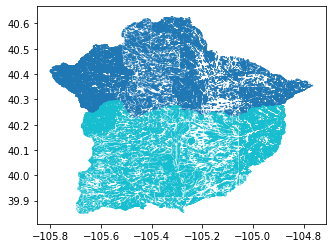

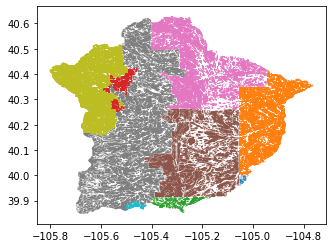

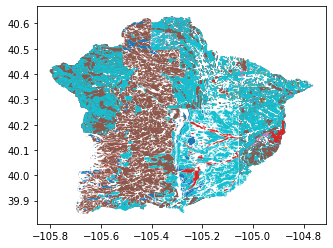

In [324]:
#plots
intersection.plot(column='NAME')
intersection.plot(column='mapunitid')
intersection.plot(column='drclassdcd')